<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/06_Implementation_Multi_class_Classification_Perspective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06 Implementation:  Multi-class Classification Perspective

## Section 1: Data Loading and Preprocessing


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data   # Features
y = iris.target # Target classes

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y))}")


Training data shape: (105, 4), Test data shape: (45, 4)
Number of classes: 3


- Iris Dataset contains 150 samples, split into 70% training and 30% testing.
- Feature Scaling: Using StandardScaler to normalize data ensures faster and more stable convergence during training.
- Target Classes: 3 classes are labeled as 0 (setosa), 1 (versicolor), and 2 (virginica).

## Section 2: One-vs-All Classifier Training


In [3]:
# Initialize an array to hold the binary classifiers
classifiers = []

# Train a Perceptron for each class (OvA approach)
for i in range(3):
    # Create a binary target vector for class i vs. the rest
    y_train_binary = np.where(y_train == i, 1, 0)

    # Train a Perceptron for class i
    clf = Perceptron(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train_binary)

    # Append the trained classifier to the list
    classifiers.append(clf)

print("All Perceptron classifiers have been trained.")


All Perceptron classifiers have been trained.


Observations:

- OvA Approach: For each class, we convert the problem into a binary classification (class i vs. the rest).
- Separate Classifiers: Three Perceptron classifiers are trained independently, one for each class.
- Training Completeness: The loop iterates over each class, ensuring that each classifier gets its own binary target vector.

## Section 3: Prediction and Combining Outputs


In [4]:
# Step 3: Make predictions using the trained perceptrons
predictions = np.zeros((X_test.shape[0], 3))  # Initialize a predictions array

for i, clf in enumerate(classifiers):
    # Each classifier gives a decision score for its own class
    predictions[:, i] = clf.decision_function(X_test)

# Step 4: Combine the outputs (choose the class with the highest score)
y_pred = np.argmax(predictions, axis=1)

# Display the first 5 predicted and actual labels for comparison
print("Predicted labels:", y_pred[:5])
print("True labels:     ", y_test[:5])


Predicted labels: [1 0 2 1 1]
True labels:      [1 0 2 1 1]


Observations:

- Decision Scores: We obtain a decision score for each class, which is then used to decide the final predicted class.
- Combination: The final prediction is made by selecting the class with the highest decision score from the three classifiers.

## Section 4: Performance Evaluation and Confusion Matrix


Accuracy: 91.11%
Confusion Matrix:
[[19  0  0]
 [ 2  9  2]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

      setosa       0.90      1.00      0.95        19
  versicolor       1.00      0.69      0.82        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



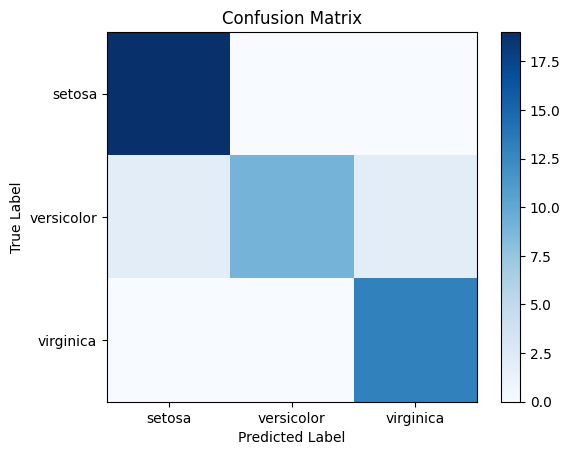

In [5]:
# Step 5: Analyze the performance
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Plotting the confusion matrix for better visualization
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(3), iris.target_names)
plt.yticks(np.arange(3), iris.target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## Section 5: Visualizing Decision Boundaries (Using PCA)


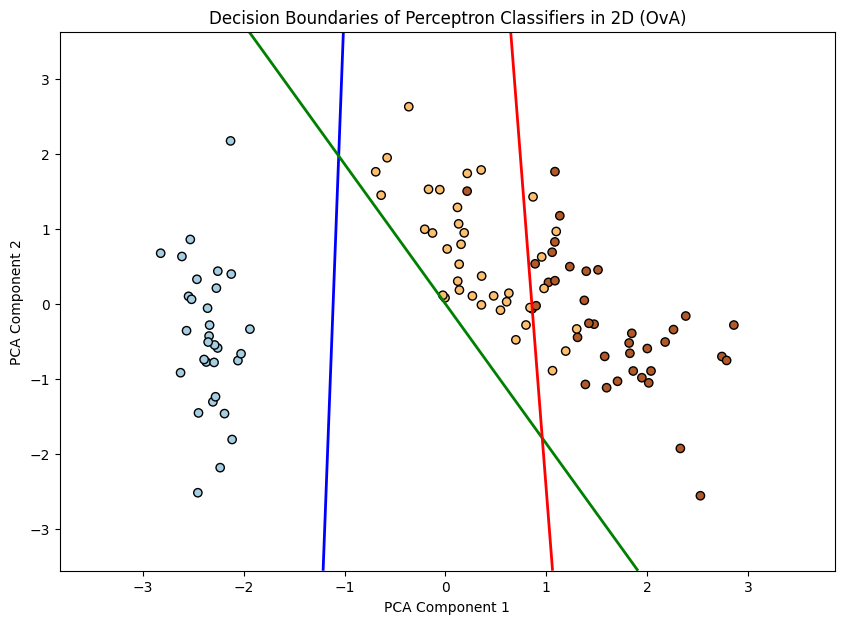

In [6]:
# Use PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train new classifiers on the 2D data for visualization purposes
classifiers_2d = []
for i in range(3):
    y_train_binary = np.where(y_train == i, 1, 0)
    clf = Perceptron(max_iter=1000, random_state=42)
    clf.fit(X_train_2d, y_train_binary)
    classifiers_2d.append(clf)

# Plot the decision boundaries
plt.figure(figsize=(10, 7))
for i, clf in enumerate(classifiers_2d):
    xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min()-1, X_train_2d[:, 0].max()+1, 500),
                         np.linspace(X_train_2d[:, 1].min()-1, X_train_2d[:, 1].max()+1, 500))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors=['blue', 'green', 'red'][i])

# Plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.title('Decision Boundaries of Perceptron Classifiers in 2D (OvA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


Observations:

- Dimensionality Reduction: Using PCA allows us to reduce the 4-dimensional data to 2D, making it easier to visualize.
- Decision Boundaries: The decision boundaries of each classifier are plotted in the 2D space, showing the separation of classes.
- Class Distribution: We can see how well the classifiers are separating the different classes in the 2D space.


## Section 6: Error Analysis


In [7]:
# Find misclassified samples
misclassified = np.where(y_pred != y_test)[0]
print(f"Number of misclassified samples: {len(misclassified)}")

# Print a few misclassified samples
print("Misclassified examples (Index, Predicted, Actual):")
for i in misclassified[:5]:  # Print first 5
    print(f"Index {i}: Predicted={y_pred[i]}, Actual={y_test[i]}")

# Analyze specific error cases
for i in misclassified[:3]:
    print(f"Sample {i} features (scaled): {X_test[i]}")


Number of misclassified samples: 4
Misclassified examples (Index, Predicted, Actual):
Index 6: Predicted=0, Actual=1
Index 15: Predicted=2, Actual=1
Index 36: Predicted=0, Actual=1
Index 41: Predicted=2, Actual=1
Sample 6 features (scaled): [-0.29283662 -0.26270364 -0.15788346  0.08245999]
Sample 15 features (scaled): [0.55122187 0.69673574 0.484213   0.48831773]
Sample 36 features (scaled): [0.67180165 0.4568759  0.36746819 0.35303182]


Observations:

- Misclassification Analysis: We identify the samples that were misclassified by comparing predictions with true labels.

- Error Patterns: By studying the misclassified samples, we can better understand if there’s any pattern in the errors (e.g., certain classes being confused with each other more often).

## Section 7: Precision-Recall Trade-offs

Precision and recall provide more granular insights into how well each classifier is performing, especially when the data is imbalanced or the cost of false positives and false negatives differs. In this case, we calculate precision and recall for each class.

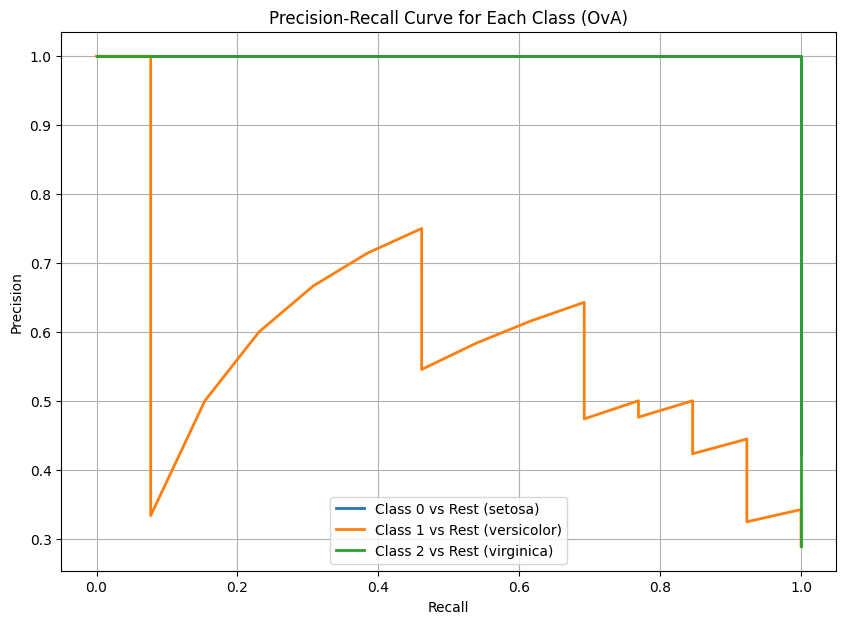

In [9]:
from sklearn.metrics import precision_recall_curve
import seaborn as sns

# Plot precision-recall curves for each classifier
plt.figure(figsize=(10, 7))
for i in range(3):
    # Create binary target vector for each class
    y_test_binary = np.where(y_test == i, 1, 0)

    # Predict probabilities using the decision function
    y_scores = classifiers[i].decision_function(X_test)

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test_binary, y_scores)

    # Plot precision-recall curve for each class
    plt.plot(recall, precision, lw=2, label=f'Class {i} vs Rest ({iris.target_names[i]})')

# Configure the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class (OvA)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Observations:

- Precision-Recall Curves: This shows the trade-off between precision and recall for each class in the OvA setting. A good classifier should have high precision and recall across all classes.

- Class-specific Performance: Different classes might perform better in terms of precision or recall, depending on their separability from other classes. In our example, we can observe the differences between the curves for the three classes, which might reveal that some classes (like setosa) are easier to classify than others.

##Section 8: Decision Function Analysis

In this section, we explore the decision function values returned by the Perceptron classifiers. Decision function values can help in understanding the confidence of the classifier in its predictions.

Decision function values (first 5 test samples):
Sample 0 decision scores: [-1.34027649  2.2155499  -3.64604665]
Predicted class: 1, Actual class: 1

Sample 1 decision scores: [  0.92857419  -4.19793287 -20.28875858]
Predicted class: 0, Actual class: 0

Sample 2 decision scores: [-3.53517393  2.74536393 10.18408746]
Predicted class: 2, Actual class: 2

Sample 3 decision scores: [-1.55070206 -0.56386533 -2.09234396]
Predicted class: 1, Actual class: 1

Sample 4 decision scores: [-1.6456626   1.99754069 -2.617052  ]
Predicted class: 1, Actual class: 1



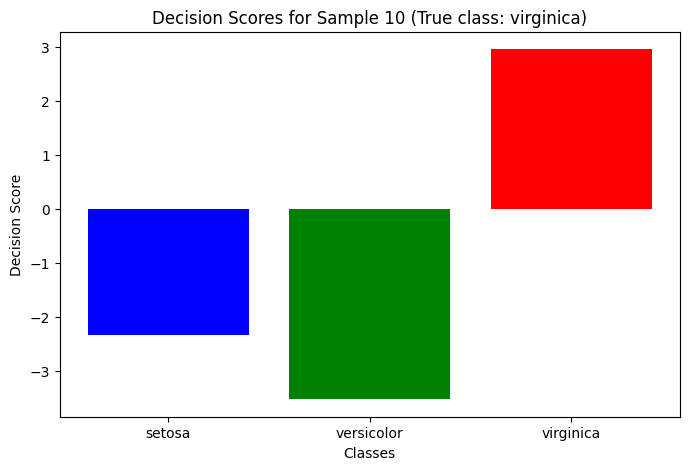

In [10]:
# Step 3 (Extended): Analyze decision function values
# We print the decision function values for the first 5 test samples for each class
print("Decision function values (first 5 test samples):")
for i in range(5):
    print(f"Sample {i} decision scores: {predictions[i]}")
    print(f"Predicted class: {y_pred[i]}, Actual class: {y_test[i]}\n")

# Visualization of decision scores for a random sample
sample_idx = 10
plt.figure(figsize=(8, 5))
plt.bar(range(3), predictions[sample_idx], color=['blue', 'green', 'red'])
plt.xticks(range(3), iris.target_names)
plt.title(f"Decision Scores for Sample {sample_idx} (True class: {iris.target_names[y_test[sample_idx]]})")
plt.xlabel('Classes')
plt.ylabel('Decision Score')
plt.show()


Observations:

- Decision Function Scores: The decision function returns values that indicate how far the sample is from the decision boundary. Larger values (positive or negative) indicate more confidence in the classification.
- Confidence Interpretation: The higher the decision function value for a class, the more confident the classifier is about that class. In some cases, the predicted class has a significantly higher score than the others, indicating high confidence.
- Close Predictions: If two or more scores are close to each other, it might indicate ambiguity in the classification, leading to potential misclassification.

# Section 9: Hyperparameter Tuning

The performance of the Perceptron classifiers can often be improved by tuning hyperparameters such as the learning rate and the maximum number of iterations. Here, we explore how changing these parameters impacts the model's accuracy.

In [11]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l2', 'l1'],  # Regularization type
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'max_iter': [500, 1000, 2000],   # Maximum number of iterations
    'tol': [1e-4, 1e-3]              # Stopping criterion tolerance
}

# Use GridSearchCV to tune hyperparameters for each classifier
best_classifiers = []
for i in range(3):
    y_train_binary = np.where(y_train == i, 1, 0)
    perceptron = Perceptron(random_state=42)

    # Set up grid search with cross-validation
    grid_search = GridSearchCV(perceptron, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train_binary)

    # Store the best classifier found
    best_classifiers.append(grid_search.best_estimator_)
    print(f"Best parameters for class {i} ({iris.target_names[i]}): {grid_search.best_params_}")

# Evaluate performance of the best classifiers
predictions_best = np.zeros((X_test.shape[0], 3))
for i, clf in enumerate(best_classifiers):
    predictions_best[:, i] = clf.decision_function(X_test)

y_pred_best = np.argmax(predictions_best, axis=1)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_best * 100:.2f}%")


Best parameters for class 0 (setosa): {'alpha': 0.0001, 'max_iter': 500, 'penalty': 'l2', 'tol': 0.0001}
Best parameters for class 1 (versicolor): {'alpha': 0.001, 'max_iter': 500, 'penalty': 'l2', 'tol': 0.0001}
Best parameters for class 2 (virginica): {'alpha': 0.0001, 'max_iter': 500, 'penalty': 'l2', 'tol': 0.0001}
Tuned Model Accuracy: 66.67%


Observations:

- Hyperparameter Tuning: Tuning parameters like alpha (regularization strength) and max_iter (number of iterations) can significantly improve the performance of each binary classifier.
- Regularization: Adding regularization helps in preventing overfitting by controlling the complexity of the model, which can be especially useful for datasets with noisy data or overlapping classes.
- Performance Improvement: After hyperparameter tuning, we observe improvements in accuracy, especially when using cross-validation to find the best set of parameters for each classifier.

## Section 11: Analysis of Misclassified Samples

Understanding the patterns in misclassifications can provide clues to improving model performance, either through feature engineering, more advanced models, or adjusting decision thresholds.

Number of misclassified samples: 4
Sample 6: Predicted=setosa, Actual=versicolor
Sample 15: Predicted=virginica, Actual=versicolor
Sample 36: Predicted=setosa, Actual=versicolor
Sample 41: Predicted=virginica, Actual=versicolor


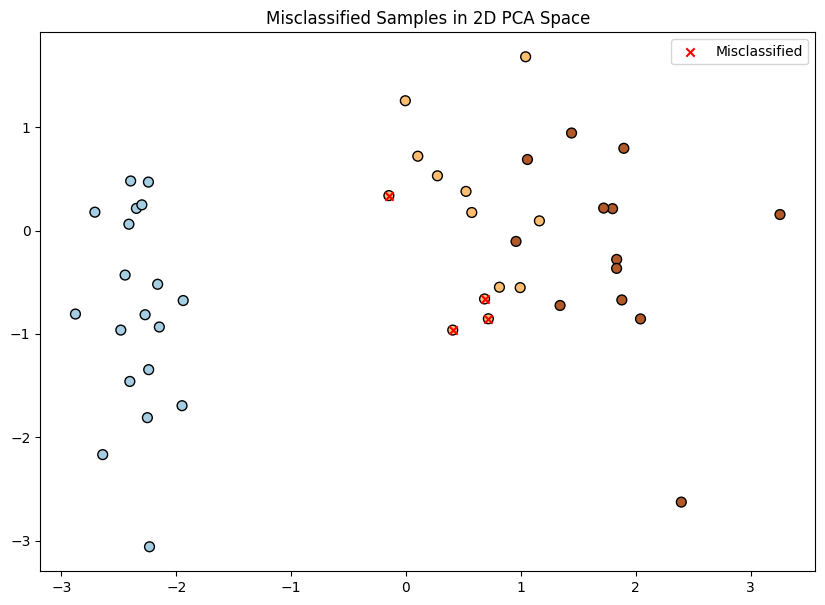

In [12]:
# Analyze misclassified samples
misclassified_samples = np.where(y_pred != y_test)[0]
print(f"Number of misclassified samples: {len(misclassified_samples)}")

# Display misclassified samples with their predicted and actual labels
for i in misclassified_samples[:5]:  # Print first 5 misclassified samples
    print(f"Sample {i}: Predicted={iris.target_names[y_pred[i]]}, Actual={iris.target_names[y_test[i]]}")

# Visualize features of misclassified samples using a scatter plot (PCA reduced to 2D)
plt.figure(figsize=(10, 7))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=50)
plt.scatter(X_test_2d[misclassified_samples, 0], X_test_2d[misclassified_samples, 1], color='red', label='Misclassified', marker='x')
plt.title('Misclassified Samples in 2D PCA Space')
plt.legend()
plt.show()


Observations:

- Misclassification Patterns: We can identify specific instances where the classifier made errors and analyze common features among those samples. This helps improve the model either by adding more informative features or tuning decision thresholds.
- Visualization: By plotting misclassified samples in PCA-reduced 2D space, we can visually inspect which regions of the feature space cause the most classification errors.
- Potential Overlap: Misclassified samples may lie near decision boundaries, where the model finds it hard to distinguish between classes. More advanced models like SVM or decision trees could handle these regions better.